In [243]:
import nltk

In [244]:
#nltk.download_shell()
#using stopwords

In [245]:
#message = [line.rstrip() for line in open('SMSSpamCollection')]

In [246]:
with open('SMSSpamCollection') as f:
    lines = [ line for line in f]

In [247]:
print(len(lines))

5574


In [248]:
lines[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [249]:
for mess_no,message in enumerate(lines[0:10]):
    print(mess_no,message)
    print('\n')


0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...



1 ham	Ok lar... Joking wif u oni...



2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



3 ham	U dun say so early hor... U c already then say...



4 ham	Nah I don't think he goes to usf, he lives around here though



5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv



6 ham	Even my brother is not like to speak with me. They treat me like aids patent.



7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune



8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Cla

In [250]:
import pandas as pd

In [251]:
message = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [252]:
message.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [253]:
message.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [254]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [255]:
message['length'] = message['message'].apply(len)

In [256]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [258]:
message

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


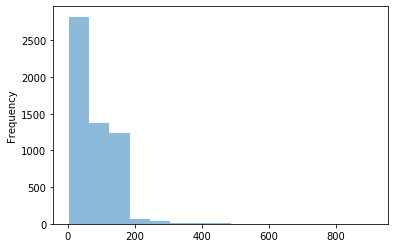

In [259]:
message['length'].plot.hist(bins=15, alpha=0.5)

In [260]:
message['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [261]:
message[message['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [262]:
message[message['length']== 80]['message'].iloc[0]

"K fyi x has a ride early tomorrow morning but he's crashing at our place tonight"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbd5b13e50>,
      dtype=object)

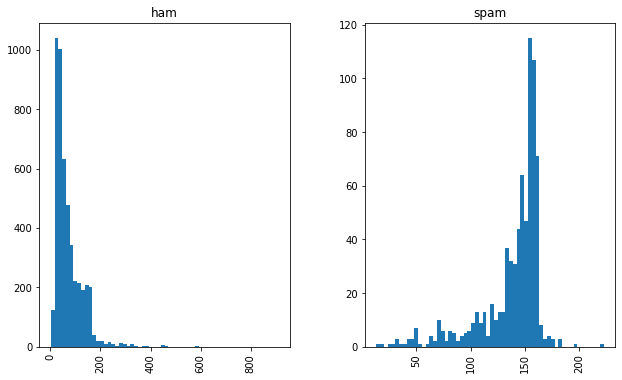

In [263]:
message.hist(column='length',
    by='label',bins=60,figsize=(10,6))

In [264]:
import string 

In [265]:
sentences = 'simple message! there is no punctuation.'

In [266]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [267]:
nopunc = [char for char in sentences if char not in string.punctuation]

In [268]:
from nltk.corpus import stopwords

In [269]:
#stopwords.words('english')

In [270]:
nopunc = ''.join(nopunc)

In [271]:
nopunc

'simple message there is no punctuation'

In [272]:
x = ['a','b','c','d']

In [273]:
x

['a', 'b', 'c', 'd']

In [274]:
x = '_'.join(x)

In [275]:
x

'a_b_c_d'

In [276]:
nopunc.split()

['simple', 'message', 'there', 'is', 'no', 'punctuation']

In [277]:
clean_message = [char for char in nopunc.split() if char.lower() not in stopwords.words('english')]

In [278]:
clean_message

['simple', 'message', 'punctuation']

In [279]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [280]:
message['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [281]:
from sklearn.feature_extraction.text import CountVectorizer

In [282]:
bow_transfer = CountVectorizer(analyzer=text_process)

In [283]:
bow_transfer.fit(message['message'])

CountVectorizer(analyzer=<function text_process at 0x7ffbd91b3a70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [284]:
print(len(bow_transfer.vocabulary_))

11425


In [285]:
mess4 = message['message'][3]

In [286]:
print(mess4)

U dun say so early hor... U c already then say...


In [287]:
bow4 = bow_transfer.transform([mess4])

In [288]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [289]:
print(bow4.shape)

(1, 11425)


In [290]:
bow_transfer.get_feature_names()[9554]

'say'

In [291]:
bow_mess = bow_transfer.transform(message['message'])

In [292]:
print('shape of sprase matrix:', bow_mess.shape)

shape of sprase matrix: (5572, 11425)


In [293]:
bow_mess.nnz

50548

In [294]:
from sklearn.feature_extraction.text import TfidfTransformer

In [238]:
tf_idtransformer = TfidfTransformer()

In [239]:
tf_idtransformer.fit(bow_mess)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [240]:
tfid4 = tf_idtransformer.transform(bow4)

In [242]:
print(tfid4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [88]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [90]:
import nltk
sentences = nltk.sent_tokenize(paragraph)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/ranjitsah/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************
